<a href="https://colab.research.google.com/github/Radhika-0403/Machine-Learning/blob/main/Regularization_on_Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('/content/HousingData.csv')

In [ ]:
# Identify missing values in the dataset
missing_values = data.isna().sum()
print("Missing values before imputation:")
print(missing_values)

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Specify columns to impute (assuming all columns contain numerical data)
columns_to_impute = data.columns

# Apply imputer to the specified columns
data1 = pd.DataFrame(imputer.fit_transform(data[columns_to_impute]), columns=columns_to_impute)

# Check if there are any remaining missing values after imputation
missing_values_imputed = data1.isna().sum()
print("Missing values after imputation:")
print(missing_values_imputed)


Missing values before imputation:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
Missing values after imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
# Data preprocessing
X = data1.drop(columns=['MEDV'])
y = data1['MEDV']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Feature importance
ridge = Ridge()
ridge.fit(X_scaled, y)
feature_importance = pd.Series(ridge.coef_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
RM         2.889439
RAD        2.280176
ZN         0.914957
B          0.851427
CHAS       0.764223
INDUS     -0.276578
AGE       -0.293948
CRIM      -0.936077
TAX       -1.730023
NOX       -1.915433
PTRATIO   -2.001163
DIS       -3.109234
LSTAT     -3.250680
dtype: float64


In [ ]:
# Model training and evaluation
pipeline = make_pipeline(StandardScaler(), Ridge())
scores = cross_val_score(pipeline, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
mse = -scores.mean()
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 37.58952394700285


In [ ]:
# Polynomial regression
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_scaled)
model = Ridge()
model.fit(X_poly, y)
poly_score = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Polynomial Regression Mean Squared Error: {-poly_score}")

Polynomial Regression Mean Squared Error: 37.52761003739287


In [ ]:
# 1. Feature Engineering: Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 2. Hyperparameter Tuning: Perform grid search for alpha in Ridge regression
param_grid = {'alpha': [10.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 3. Regularization: Train a Ridge regression model with the best alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Evaluate the model on the testing set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best alpha: 10.0
Mean Squared Error: 16.321513982787007


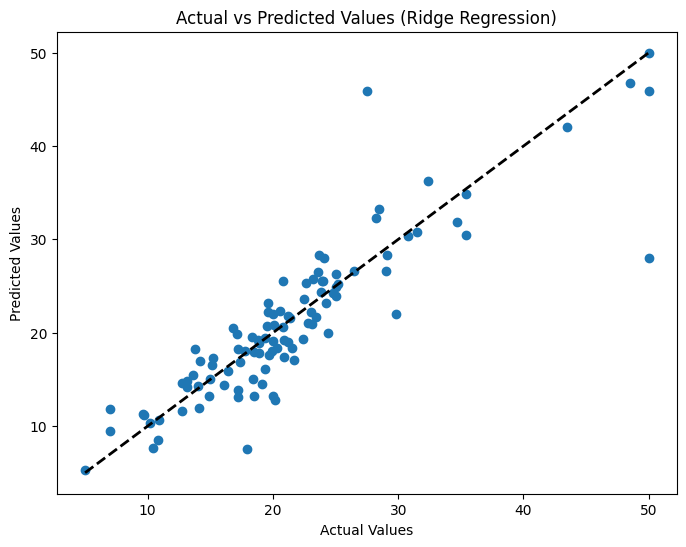

In [ ]:
# Predict on the test set
y_pred = ridge.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.show()